In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


In [16]:
wind_data = pd.read_csv('train-en.csv')
x_train = pd.read_csv('train-en.csv', usecols = ['wind_speed48M'])
y_train = pd.read_csv('train-en.csv', usecols = ['Output'])

In [3]:
wind_data

,Date,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed_100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
0,2016-01-01 0:00:00,8.490,10.7700,12.690,188.00,190.00,194.00,9.0700,9.6300,10.0600,10.43,10.7800,11.0500,11.5400,11.9400,12.4200,0,122400,79168
1,2016-01-01 0:15:00,8.395,10.6175,12.475,190.75,193.00,196.75,9.0425,9.5550,9.9550,10.31,10.6300,10.9275,11.3875,11.8150,12.3125,1,122400,75124
2,2016-01-01 0:30:00,8.300,10.4650,12.260,193.50,196.00,199.50,9.0150,9.4800,9.8500,10.19,10.4800,10.8050,11.2350,11.6900,12.2050,1,122400,76072
3,2016-01-01 0:45:00,8.205,10.3125,12.045,196.25,199.00,202.25,8.9875,9.4050,9.7450,10.07,10.3300,10.6825,11.0825,11.5650,12.0975,1,122400,67964
4,2016-01-01 1:00:00,8.110,10.1600,11.830,199.00,202.00,205.00,8.9600,9.3300,9.6400,9.95,10.1800,10.5600,10.9300,11.4400,11.9900,0,122400,69988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52503,2017-06-30 22:45:00,4.920,5.9475,6.580,269.25,271.25,272.50,4.5700,5.0375,5.4325,5.73,6.0125,6.2125,6.4175,6.7325,7.2175,1,119000,13688
52504,2017-06-30 23:00:00,5.030,6.0900,6.730,269.00,271.00,272.00,4.6800,5.1800,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,0,119000,17624
52505,2017-06-30 23:15:00,5.030,6.0900,6.730,269.00,271.00,272.00,4.6800,5.1800,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,1,119000,18528
52506,2017-06-30 23:30:00,5.030,6.0900,6.730,269.00,271.00,272.00,4.6800,5.1800,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,1,119000,15836


In [4]:
wind_data.describe()

,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed_100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
count,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000
mean,5.626846,6.834925,7.583339,189.824055,191.399815,193.528853,5.416193,5.886837,6.261161,6.550166,6.848693,7.120104,7.410151,7.785677,8.255469,0.750000,120019.562733,27293.661461
std,2.466787,2.883092,3.278293,91.303825,91.768030,91.859828,2.768315,2.807045,2.836366,2.860242,2.884179,2.906680,2.930317,2.959489,2.998728,0.433017,4636.559770,29313.824237
min,0.550000,0.580000,0.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.370000,0.580000,0.740000,1.000000,1.330000,1.740000,0.000000,0.000000,-1628.000000
25%,3.925000,4.850000,5.225000,119.000000,119.500000,122.000000,3.525000,3.969375,4.320000,4.590000,4.865000,5.120000,5.395000,5.752500,6.190000,0.750000,119000.000000,4928.000000
50%,5.330000,6.650000,7.395000,207.000000,209.250000,212.000000,5.250000,5.720000,6.090000,6.370000,6.662500,6.930000,7.213750,7.575000,8.035000,1.000000,122400.000000,17300.000000
75%,6.965000,8.555000,9.700000,255.500000,258.000000,260.500000,7.075000,7.577500,7.960000,8.260000,8.570000,8.850000,9.160000,9.545000,10.030000,1.000000,122400.000000,40415.000000
max,18.870000,21.690000,23.360000,360.000000,360.000000,360.000000,19.610000,20.180000,20.750000,21.380000,21.700000,22.160000,22.580000,22.980000,23.470000,1.000000,122400.000000,120520.000000


In [5]:
wind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52508 entries, 0 to 52507
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                52508 non-null  object 
 1   wind_speed48M       52508 non-null  float64
 2   wind_speed100M      52508 non-null  float64
 3   wind_speed152M      52508 non-null  float64
 4   wind_direction48M   52508 non-null  float64
 5   wind_direction100M  52508 non-null  float64
 6   wind_direction152M  52508 non-null  float64
 7   wind_speed_100MP10  52508 non-null  float64
 8   wind_speed_100MP20  52508 non-null  float64
 9   wind_speed_100MP30  52508 non-null  float64
 10  wind_speed_100MP40  52508 non-null  float64
 11  wind_speed_100MP50  52508 non-null  float64
 12  wind_speed_100MP60  52508 non-null  float64
 13  wind_speed_100MP70  52508 non-null  float64
 14  wind_speed_100MP80  52508 non-null  float64
 15  wind_speed_100MP90  52508 non-null  float64
 16  Inte

C:\Users\Gbadamosi\AppData\Local\Temp\ipykernel_1612\525031488.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wind_data.corr(), annot = True, ax = ax)


<Axes: >

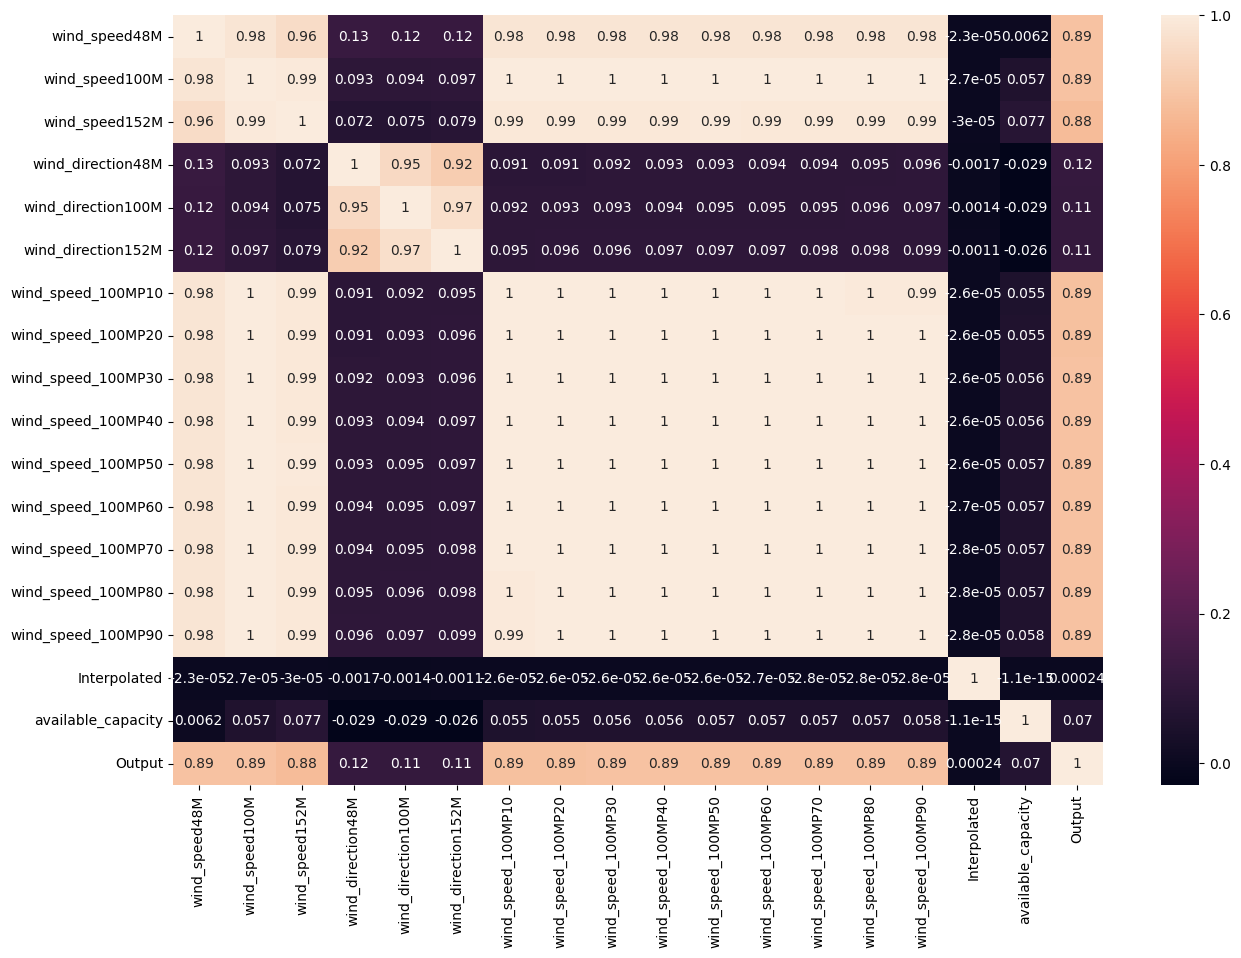

In [14]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(wind_data.corr(), annot = True, ax = ax)

In [19]:
x_train

,wind_speed48M
0,8.490
1,8.395
2,8.300
3,8.205
4,8.110
...,...
52503,4.920
52504,5.030
52505,5.030
52506,5.030


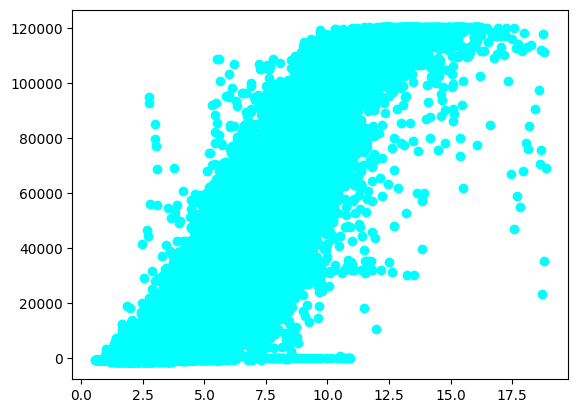

In [18]:
plt.scatter(x_train, y_train, color = 'cyan')
plt.show()

In [ ]:
Write a code that can check if the turbine is working well at certain week speeds. 

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score   

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train, y_train)

LinearRegression()

In [23]:
scores = model.score(x_train, y_train)

In [25]:
x_test = pd.read_csv('eval-en.csv', usecols = ['wind_speed48M'])
y_test = pd.read_csv('eval-en.csv', usecols = ['Output'])

In [38]:
predictions = model.predict(x_test)


In [40]:
print(np.round(predictions))

[[19083.]
 [19875.]
 [20668.]
 ...
 [77533.]
 [77533.]
 [77533.]]


In [33]:
y_test

,Output
0,15912
1,18736
2,19680
3,18112
4,21144
...,...
17663,111028
17664,90668
17665,103344
17666,115660


In [41]:
accuracy = accuracy_score(y_test, np.round(predictions))

In [43]:
print(accuracy *100)

0.005659950192438306
